# Diferencia Media Logaritmica de Temperatura (LMTD)

La diferencia media logarítmica de temperatura está dada por la siguiente fórmula:

$$ LMTD = \frac{(T_{1}-t_{2}) - (T_{2}-t_{1})}{ln \left(\frac{T_{1}-t_{2}}{T_{2}-t_{1}}\right)} $$

$$ LMTD = \frac{(\Delta T_{1}) - (\Delta T_{2})}{ln \left(\frac{\Delta T_{1}}{\Delta T_{2}}\right)} $$

Dejando de lado la teoría que acompaña a esta fórmula, la tarea es conseguir que con una $LMTD$ y una Temperatura de entrada $(T_{1})$ conocidas, obtener el resto de variables tales que LMTD se cumpla. 

Esto es con el objetivo de que se observe el cambio en el resto de variables conforme $T_{1}$ cambia y $LMTD$ permanece fija


Para resolver el problema en cuestión, con ayuda de Python 3, se me ocurren dos opciones para afrontar el problema: 

1. **Métodos numéricos**
2. **Probar con todas las permutaciones en un intervalo $[1-T_{1}]$**

## Opción 1

En un principio pensé que tal vez los métodos iterativos para encontrar la raíz de la ecuación no lineal funcionarían, pero una breve comprobación en Wolfram (no espero que sea  la opción más confiable y por ello recurro a usted) me arroja que la ecuación no posee una raíz calculable, además, por simple intuición creo que el uso de uno de estos métodos no es posible para dar con 3 variables introduciendo solo 2 valores conocidos, al menos no sin hacer algún tipo de transformación de la ecuación. Le consulto para saber si existe una opción desde los métodos numéricos o las matemáticas en general, para realizar la tarea. 

## Opción 2

Está es quiza la opción que puedo empezar a desarrollar, el inconveniente es que las permutaciones crecen con el factorial de $T_{1}$ lo que es una solución poco económica en términos computacionales, que si bien, una computadora normal puede realizar, tal vez sea una solución un poco lenta y muy poco elegante. La ventaja es que los valores conocidos para $T_{1}$ no rebasan los 30°. Sin duda puedo reducir los cálculos introduciendo algunas restricciones. Por ahora planteo restringir las entradas al dominio de la ecuación.

## Solución manual

He trabajado en una solución manual que satisface en cierta medida los requerimientos del problema. El objetivo ultimo, es que esta tarea se automatice.

En el código de abajo se introducen las variables y se obtiene la $LMTD$ ademas de los deltas y una representación gráfica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive

%matplotlib inline

In [2]:
def Tml_contra(T_hs_in,T_hs_out, T_f_in, T_f_out):
    delta_T1 = T_hs_in - T_f_out
    delta_T2 = T_hs_out - T_f_in
    
    Tmlc = (delta_T1-delta_T2)/np.log(delta_T1/delta_T2)
    
    #Generación del gráfico
    fig1, ax1 = plt.subplots()
    ax1.plot([T_hs_out,T_hs_in], 'r--')
    ax1.plot([T_f_in, T_f_out], 'b--')
    ax1.set_ylabel(' T °C ', fontsize = 12)
    
    ax2 = ax1.twinx()
    ax2.plot([T_hs_out,T_hs_in], 'r<', markersize = 8, label = 'Calor')
    ax2.plot([T_f_in, T_f_out], 'b>', markersize = 8, label = 'Frijolito')
    ax2.set_ylabel(' T °C ', fontsize = 12)
  
    ax2.annotate('Tmlc: '+str(round(Tmlc,2)),
            xy=(0.3 , T_hs_in), xycoords='data',
            xytext=(0.3, T_hs_in), textcoords='data')
    ax2.legend()
    
    plt.title('Tml contra corriente')
    plt.grid()
    plt.xticks([])
    plt.show()
    
    msg = f"La TML es: {delta_T1} Delta T1 es:{delta_T1} Delta T2 es:{delta_T2}"
    msg1 = f"La TML es: {Tmlc} Delta T1 es:{delta_T1} Delta T2 es:{delta_T2}"

    if delta_T1 == delta_T2:
        return msg
    else:
        return msg1

Donde:

- Tml_contra = Tmlc = $LMTD$
- T_hs_in = $T_{1}$
- T_hs_out = $T_{2}$
- T_f_in = $t_{1}$
- T_f_out = $t_{2}$

El objetivo es que mediante la introducción de valores diferentes de entrada (de manera manual) se obtuviera la $LMTD$ deseada.

Como ejemplo, para una $LMTD$ deseada de $\approx 5$ se realiza lo siguiente:

$$ \frac{(T_{1}-t_{2}) - (T_{2}-t_{1})}{ln \left(\frac{T_{1}-t_{2}}{T_{2}-t_{1}}\right)} \approx 5$$


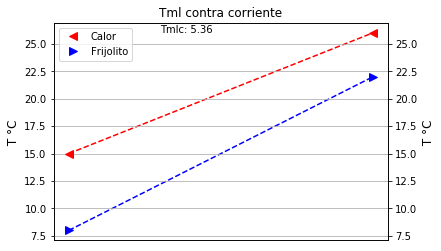

'La TML es: 5.360820878674329 Delta T1 es:4 Delta T2 es:7'

In [3]:
T_hs_in = 26
T_hs_out = 15

T_f_in = 8
T_f_out = 22

Tml_contra(T_hs_in,T_hs_out, T_f_in, T_f_out)

## Solución interactiva

Tratando de hacer más facil el procedimiento anterior, propuse tambien la solución interactiva de la ecuación como se muestra a continuación.

In [4]:
ejemplo = interactive(Tml_contra, T_hs_in = (1,26, 0.5),
                      T_hs_out = (1,25, 0.5), T_f_in=(1,24, 0.5),
                      T_f_out = (1,23, 0.5))
ejemplo
display(ejemplo)

interactive(children=(FloatSlider(value=13.0, description='T_hs_in', max=26.0, min=1.0, step=0.5), FloatSlider…

## Valores de entrada

In [5]:
df = pd.read_csv('ejemplo.csv')

In [6]:
df

,Mes,Ts,T_700,Delta_T
0,1,27.116372,5.812999,21.303374
1,2,26.772363,5.784035,20.988328
2,3,26.920625,5.758427,21.162198
3,4,27.449325,5.735544,21.713781
4,5,28.325766,5.715167,22.610599
5,6,28.641716,5.690727,22.950990
6,7,29.019432,5.666853,23.352579
7,8,29.486995,5.643587,23.843408
8,9,29.763971,5.618978,24.144993
9,10,29.510811,5.590784,23.920028


## Generación de valores resultantes mediante operaciones aritmeticas

Con los resultados de la solución interactiva, simplemente se realizan algunas operaciones aritmeticas al valor de entrada. En este casó se usará la columna del DataFrame con la etiqueta $Ts$. Esta columna representara los valores conocidos para $T_{1}$ y a la que se le harán operaciones para generar $T_{2}, \,  t_{1} \, \& \,  t_{2}$

In [7]:
df['T2'] = df['Ts'].values - 8.5
df['t1'] = df['Ts'].values - 14.0
df['t2'] = df['Ts'].values - 5.0

In [8]:
df

,Mes,Ts,T_700,Delta_T,T2,t1,t2
0,1,27.116372,5.812999,21.303374,18.616372,13.116372,22.116372
1,2,26.772363,5.784035,20.988328,18.272363,12.772363,21.772363
2,3,26.920625,5.758427,21.162198,18.420625,12.920625,21.920625
3,4,27.449325,5.735544,21.713781,18.949325,13.449325,22.449325
4,5,28.325766,5.715167,22.610599,19.825766,14.325766,23.325766
5,6,28.641716,5.690727,22.950990,20.141716,14.641716,23.641716
6,7,29.019432,5.666853,23.352579,20.519432,15.019432,24.019432
7,8,29.486995,5.643587,23.843408,20.986995,15.486995,24.486995
8,9,29.763971,5.618978,24.144993,21.263971,15.763971,24.763971
9,10,29.510811,5.590784,23.920028,21.010811,15.510811,24.510811


## Comprobación

Introduciendo los valores generados en una función que calcule la $LMTD$ podemos comprobar si la solución es adecuada.

### Función para calcular LMTD

In [9]:
def LMTD(T1,T2,t1, t2):
    delta_T1 = T1 - t2
    delta_T2 = T2 - t1
    
    try:
        Tmlc = (delta_T1-delta_T2)/np.log(delta_T1/delta_T2)
    except:
        return NaN
    
    if delta_T1.any() == delta_T2.any():
        return delta_T1
    else:
        return Tmlc

### Comprobación

In [10]:
T1,T2,t1,t2 = df['Ts'].values, df['T2'].values, df['t1'].values, df['t2'].values

df['LMTD'] = LMTD(T1,T2,t1,t2)

In [11]:
df

,Mes,Ts,T_700,Delta_T,T2,t1,t2,LMTD
0,1,27.116372,5.812999,21.303374,18.616372,13.116372,22.116372,5.0
1,2,26.772363,5.784035,20.988328,18.272363,12.772363,21.772363,5.0
2,3,26.920625,5.758427,21.162198,18.420625,12.920625,21.920625,5.0
3,4,27.449325,5.735544,21.713781,18.949325,13.449325,22.449325,5.0
4,5,28.325766,5.715167,22.610599,19.825766,14.325766,23.325766,5.0
5,6,28.641716,5.690727,22.950990,20.141716,14.641716,23.641716,5.0
6,7,29.019432,5.666853,23.352579,20.519432,15.019432,24.019432,5.0
7,8,29.486995,5.643587,23.843408,20.986995,15.486995,24.486995,5.0
8,9,29.763971,5.618978,24.144993,21.263971,15.763971,24.763971,5.0
9,10,29.510811,5.590784,23.920028,21.010811,15.510811,24.510811,5.0


In [15]:
%load_ext watermark

%watermark -v -m -p matplotlib,pandas,numpy,ipywidgets,watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.6
IPython 7.12.0

matplotlib 3.1.3
pandas 1.0.1
numpy 1.18.1
ipywidgets 7.5.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


1.18.1
